In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
import nibabel as nib

In [3]:
path = '/home/mkhanmhmdi/Downloads/SAM(click base)/SAM-Med2D/PyQt/SAM-Med2D/BratsData/BraTS2021_00022/BraTS2021_00022_flair.nii.gz'
img = nib.load(path)
a = np.array(img.dataobj)

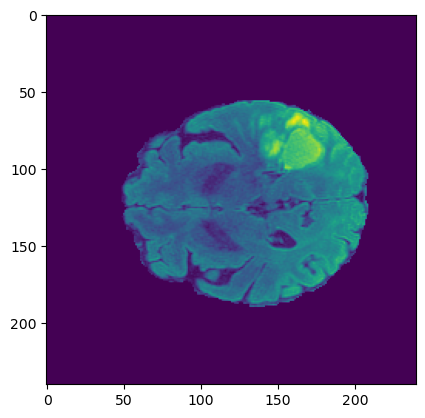

In [4]:
plt.imshow(a[:,:,80])

In [5]:
path = '/home/mkhanmhmdi/Downloads/SAM(click base)/SAM-Med2D/PyQt/SAM-Med2D/BratsData/BraTS2021_00022/BraTS2021_00022_seg.nii.gz'
img = nib.load(path)
a = np.array(img.dataobj)

In [34]:
a.shape

(240, 240, 155)

In [35]:
a[a==2] = 0
a[a==4] = 0

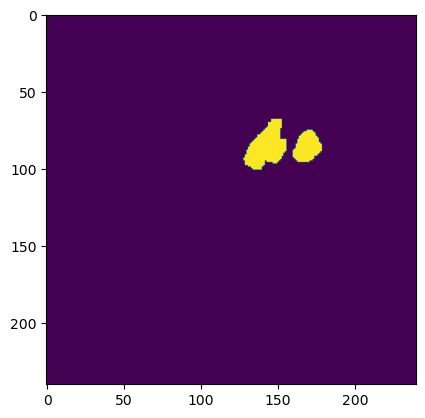

In [37]:
plt.imshow(a[:,:,90])

(1, 16, 16, 768)


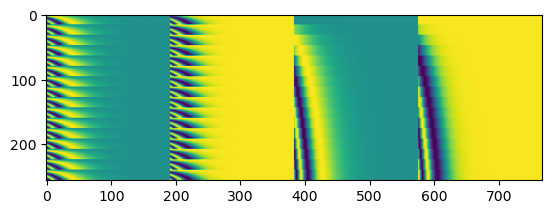

In [53]:
p = '/home/mkhanmhmdi/Desktop/'
p = np.load(p+'pos_emb.npy')

print(p.shape)
p = p.reshape(1,256,768)
plt.imshow(p[0])

(2, 256, 16, 16)


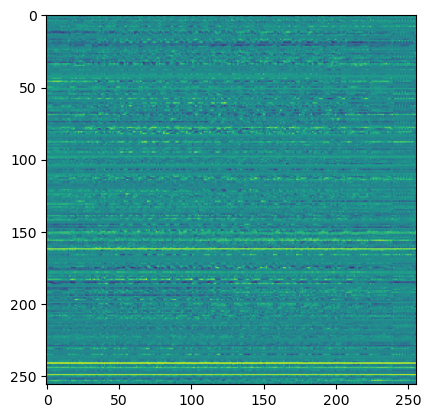

In [82]:
p = '/home/mkhanmhmdi/Desktop/'
p = np.load(p+'x(lastblock).npy')

print(p.shape)
p = p.reshape(2,256,256)
plt.imshow(p[0,:,:])

In [31]:
def find_top_n_slices(image_array, n):
    # Function to count the number of occurrences of 1 in a slice
    def count_ones(slice):
        return np.sum(slice == 1)

    # Create a list of tuples with slice index and number of 1s
    ones_counts = [(i, count_ones(slice)) for i, slice in enumerate(image_array.transpose(2, 0, 1))]

    # Sort the list by the number of 1s in descending order
    ones_counts.sort(key=lambda x: x[1], reverse=True)

    # Extract the indices of the top n slices
    top_n_indices = [idx for idx, _ in ones_counts[:n]]

    return top_n_indices

In [32]:
        a[a==2] = 0
        a[a==4] = 0


In [33]:
s = find_top_n_slices(a, 150)

In [34]:
s

[88,
 89,
 90,
 91,
 87,
 86,
 85,
 92,
 84,
 83,
 93,
 82,
 81,
 94,
 80,
 79,
 95,
 96,
 97,
 78,
 77,
 98,
 76,
 75,
 99,
 74,
 73,
 100,
 72,
 71,
 101,
 70,
 69,
 102,
 106,
 63,
 64,
 65,
 105,
 68,
 107,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 66,
 67,
 103,
 104,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

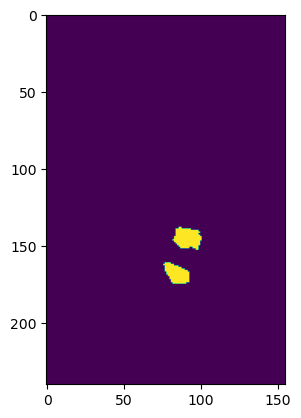

In [29]:
plt.imshow(s[20])

In [ ]:
def randomly_choose_point(images_array, top_indices):
    # Collect all coordinates where the value is 1 in the selected slices
    all_coordinates = [(i, j, k) for i in range(images_array.shape[0])
                                    for j in range(images_array.shape[1])
                                    for k in top_indices
                                    if images_array[i, j, k] == 1]

    # Randomly choose one coordinate
    chosen_coordinate = np.random.choice(all_coordinates)

    return chosen_coordinate


In [35]:

def extract_2d(image, labels):        
    img = nib.load(i_path)
    img = np.array(img.dataobj)

    label = nib.load(l_path)
    label = np.array(label.dataobj)

    label[label==2] = 0
    label[label==4] = 0

    top_6_index = find_top_n_slices(label, 150)
    index_points = randomly_choose_point(label,top_6_index)
    
    return images, points 

In [36]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import sys
from segment_anything import sam_model_registry
from segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace


class QTModel:
    def __init__(self):
        self.args = Namespace()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.args.image_size = 256
        self.args.encoder_adapter = True
        self.args.sam_checkpoint = "/home/mkhanmhmdi/Downloads/SAM(click base)/SAM-Med2D/Pretrain-Models/sam-med2d_b.pth"
        self.model = None
        self.predictor = None
        self.load_model()
        self.image = cv2.imread('/home/mkhanmhmdi/Downloads/SAM(click base)/SAM-Med2D/PyQt/SAM-Med2D/data_demo/Brats/0.png')
        self.set_image()

    def load_model(self):
        self.model = sam_model_registry["vit_b"](self.args).to(self.device)
        self.predictor = SammedPredictor(self.model)

    def set_image(self):
        self.predictor.set_image(self.image)

    def show_mask(self, mask, ax, random_color=False):
        if random_color:
            color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
        else:
            color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
        h, w = mask.shape[-2:]
        mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        ax.imshow(mask_image)

    def show_points(self, coords, labels, ax, marker_size=100):
        pos_points = coords[labels == 1]
        neg_points = coords[labels == 0]
        ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='.', s=marker_size, edgecolor='white',
                   linewidth=0.5)
        ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='.', s=marker_size, edgecolor='white',
                   linewidth=0.5)

    def show_box(self, box, ax):
        x0, y0 = box[0], box[1]
        w, h = box[2] - box[0], box[3] - box[1]
        ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

    def creat_mask(self, points, labels):
        masks, scores, logits = self.predictor.predict(
            point_coords=points,
            point_labels=labels,
            multimask_output=True,
        )
        return masks, scores, logits

ModuleNotFoundError: No module named 'segment_anything'

In [ ]:
# Which file of the brats chooses? T1, T2, ....
# How to choose 1000 from the brats files ?

def run:
    save_path = 
    brats_path = '/home/mkhanmhmdi/Desktop/...'
    brats_folders = [os.path.join(parent_folder, folder_name) for folder_name in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, folder_name))]
    for i in brats_folders:
        images, points = extract_2d(i+'',i+'')
        

 2NDHW.zip
 a.html
 anaconda3/
 a.png
 AutoDataPilot/
 bin/
 Clustering-book-code.ipynb
'Code Skeleton(2nd Assigment).ipynb'
 compressed_data.pkl
 CompressedImage.asfh
 DATA/
 Desktop/
 Desktop.ipynb
 differences/
 docker_intro.pdf
 docker-metatrader/
 docker-wine*
 Documents/
 download.png
 Downloads/
 edf-converter/
 evaluate.py
 File_management.ipynb
 fixation_global_1.mat
 fixation_global_2.mat
 fixation_local_1.mat
 fixation_local_2.mat
 Gemfile
 Gemfile.lock
 gems/
 GitHubDesktop-linux-2.6.3-linux1.deb
 GMNMT/
 GMNMT.zip
 grub.png
 HW1/
 HW1.zip
 IdeaProjects/
'Image processing 2ndHW.ipynb'
 install.sh*
 ja-netfilter-v2022.2.0/
 ja-netfilter-v2022.2.0.zip
 java_error_in_pycharm_31070.log
 java_error_in_pycharm_.hprof
 javasharedresources/
'level set methods for segmentation.ipynb'
'Linear regression from scratch.ipynb'
 log/
 log1/
 log_100_epoch/
 log_40_Epoch/
 matlab_crash_dump.4651-1
 matlab_iso/
'MetaTrader 4'/
 mt4-docker/
 Music/
 MyGraphModelSymbolicMathematics/
 NewsPopu